In [1]:
#Load data from train & test data set
from scipy.io import loadmat
train_path =r'/root/notebooks/Projects/number-detection/source/train_32x32.mat'
test_path=r'/root/notebooks/Projects/number-detection/source/test_32x32.mat'
train = loadmat(train_path)
test = loadmat(test_path)

X_train = train['X']
y_train = train['y']
X_test = test['X']
y_test = test['y']

print("Shape of X_train is:", X_train.shape)
print("Shape of y_train is:", y_train.shape)
print("Shape of X_test is:", X_test.shape)
print("Shape of y_test is:", y_test.shape)

Shape of X_train is: (32, 32, 3, 73257)
Shape of y_train is: (73257, 1)
Shape of X_test is: (32, 32, 3, 26032)
Shape of y_test is: (26032, 1)


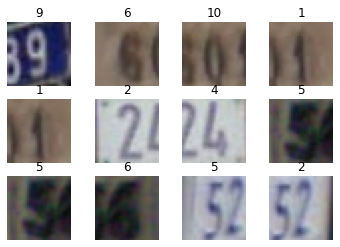

Shape of X_train is now: (73257, 32, 32, 3)
Shape of X_test is now: (26032, 32, 32, 3)


In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

X_train = X_train[:,:,:,:]
X_test = X_test[:,:,:,:]

start = 50

fig, ax = plt.subplots(3, 4)
for row in range(3):
    for col in range(4):
        ax[row, col].imshow(X_train[:,:,:,start+row*3+col])
        ax[row, col].axis('off')
        ax[row, col].set_title('{}'.format(y_train[start+row*3+col, 0]))
plt.show()



X_train = np.rollaxis(X_train, 3)
X_test = np.rollaxis(X_test, 3)

print("Shape of X_train is now:", X_train.shape)
print("Shape of X_test is now:", X_test.shape)

In [3]:
y_train = y_train[:,0]
y_test = y_test[:,0]

print("Shape of y_train is now:", y_train.shape)
print("Shape of y_test is now:", y_test.shape)

Shape of y_train is now: (73257,)
Shape of y_test is now: (26032,)


In [4]:
y_train[y_train==10] = 0
y_test[y_test==10] = 0

print("labels of y_train are", np.unique(y_train[:]))
print("labels of y_test are", np.unique(y_test[:]))

labels of y_train are [0 1 2 3 4 5 6 7 8 9]
labels of y_test are [0 1 2 3 4 5 6 7 8 9]


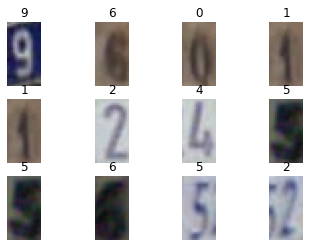

In [5]:
X_train = X_train[:,:,7:24,:]
X_test = X_test[:,:,7:24,:]

# plot cropped images
fig, ax = plt.subplots(3, 4)
for row in range(3):
    for col in range(4):
        ax[row, col].imshow(X_train[start+row*3+col,:,:,:])
        ax[row, col].axis('off')
        ax[row, col].set_title('{}'.format(y_train[start+row*3+col]))
plt.show()

In [6]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout


model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32, 17, 3)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.3),
    Conv2D(64, (3,3), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.3),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# get a summary of our built model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 15, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 6, 32)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 6, 32)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 4, 64)         18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 2, 64)         36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 1, 64)         

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
2290/2290 [==============================] - 137s 60ms/step - loss: 1.0089 - accuracy: 0.6675
Epoch 2/10
2290/2290 [==============================] - 132s 58ms/step - loss: 0.5161 - accuracy: 0.8403
Epoch 3/10
2290/2290 [==============================] - 159s 69ms/step - loss: 0.4524 - accuracy: 0.8628
Epoch 4/10
2290/2290 [==============================] - 156s 68ms/step - loss: 0.4204 - accuracy: 0.8724
Epoch 5/10
2290/2290 [==============================] - 148s 65ms/step - loss: 0.4014 - accuracy: 0.8776
Epoch 6/10
2290/2290 [==============================] - 150s 66ms/step - loss: 0.3883 - accuracy: 0.8819
Epoch 7/10
2290/2290 [==============================] - 135s 59ms/step - loss: 0.3718 - accuracy: 0.8871
Epoch 8/10
2290/2290 [==============================] - 169s 74ms/step - loss: 0.3637 - accuracy: 0.8897
Epoch 9/10
2290/2290 [==============================] - 127s 55ms/step - loss: 0.3546 - accuracy: 0.8914
Epoch 10/10
2290/2290 [==============================] 

In [ ]:
loss, acc = model.evaluate(X_test, y_test)
print("Model accuracy on test data is: {:6.3f}%".format(100 * acc))

In [ ]:
model.save('number_model.h5')